In [1]:
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.7
v tidyr   0.8.2     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


**1. What happens if you facet on a continuous variable?**

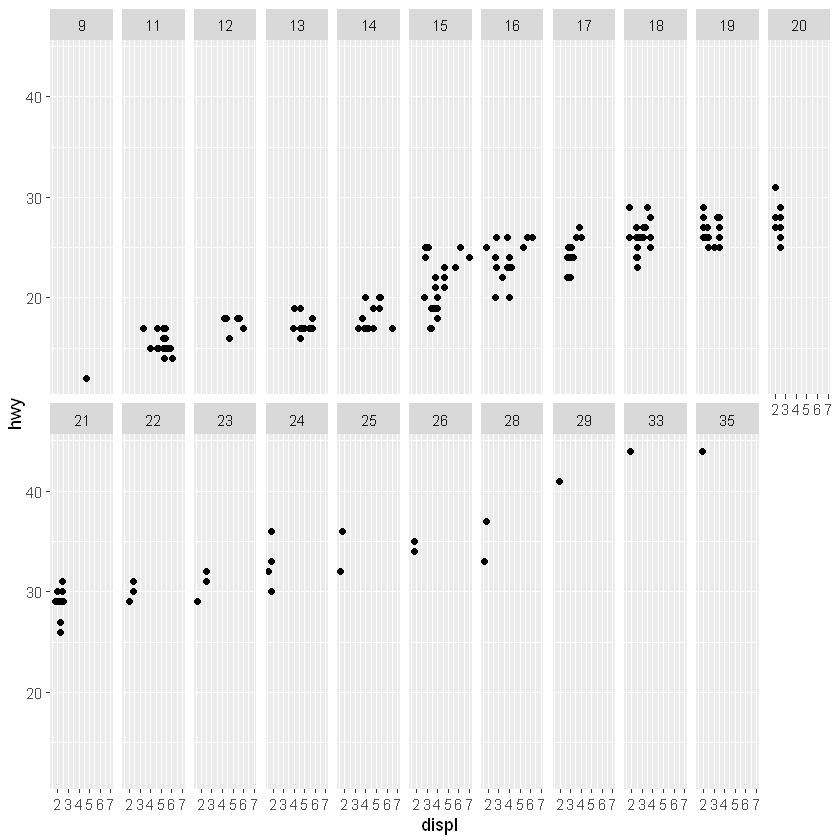

In [2]:
ggplot(data = mpg)+
    geom_point(mapping = aes(x = displ, y = hwy))+
    facet_wrap(~cty, nrow = 2)

_It generates a separate facet plot for each unique value of cty_

**2. What do the empty cells in a plot with facet_grid(drv ~ cyl)mean? How do they relate to this plot?**

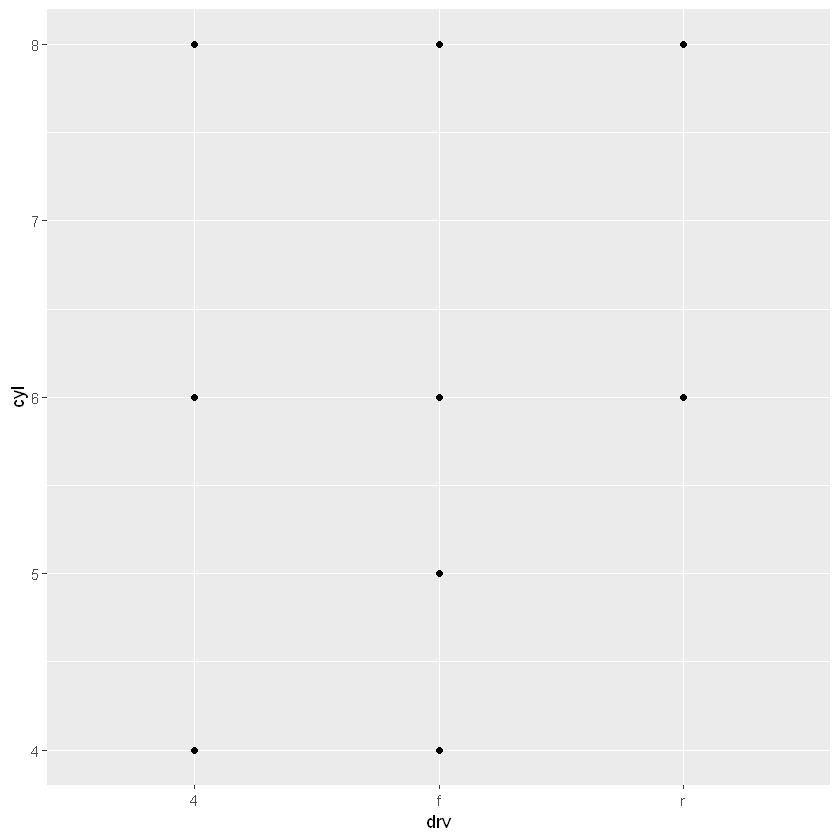

In [3]:
ggplot(data = mpg)+
    geom_point(mapping = aes(x = drv, y = cyl))

_The empty facet grids according to the dataset are combinations of drv and cyl that have no observations_

**3. What plots does the following code make? What does . do?**

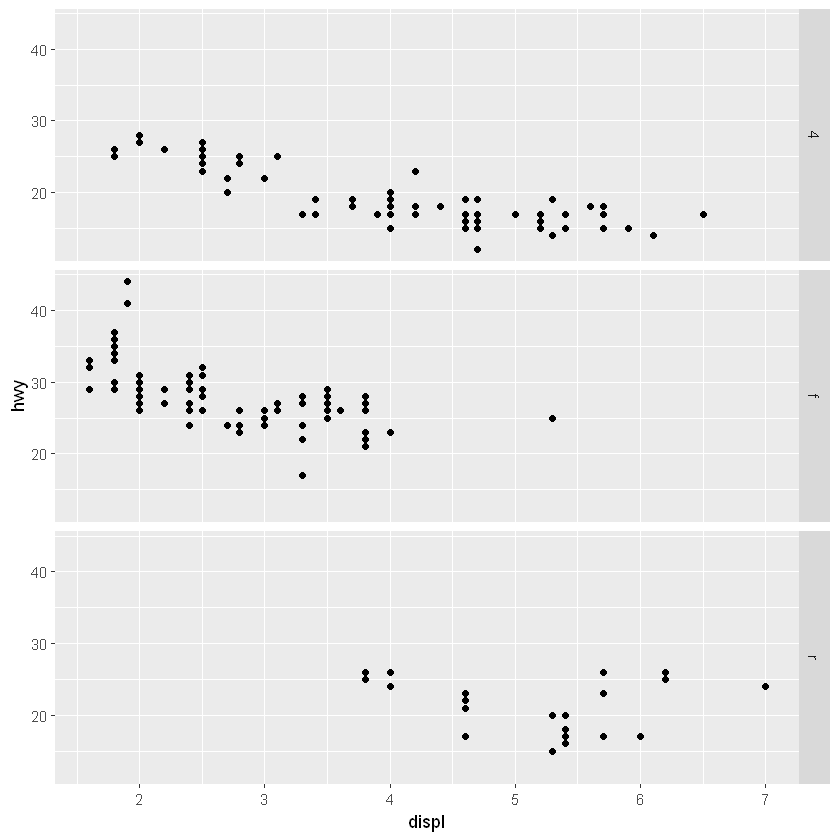

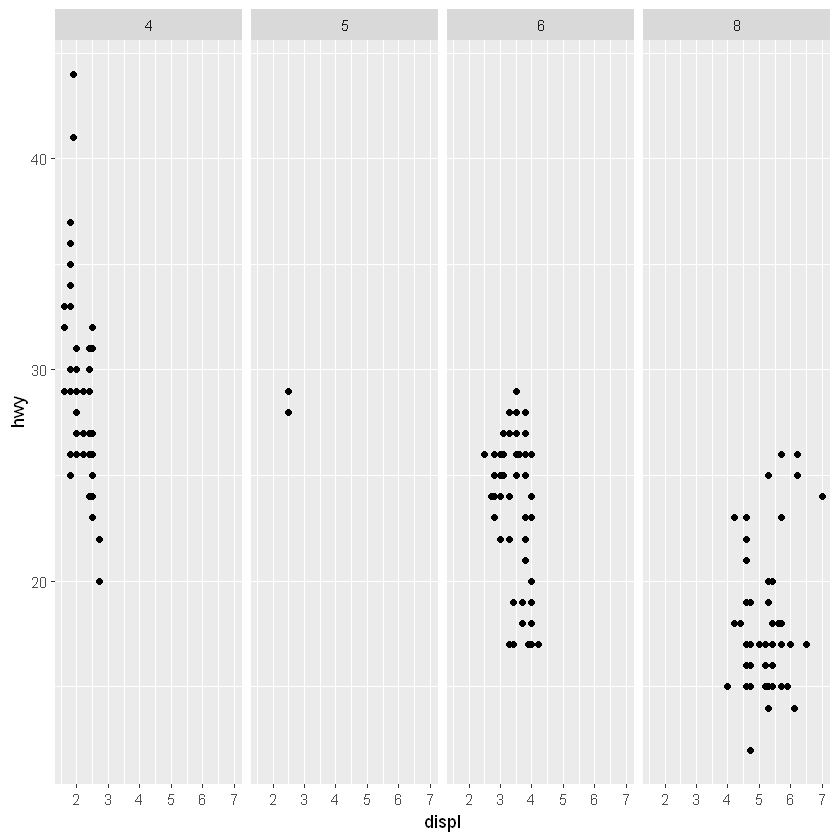

In [4]:
ggplot(data = mpg)+
    geom_point(mapping = aes(x = displ, y = hwy))+
    facet_grid(drv ~ .)
ggplot(data = mpg)+
    geom_point(mapping = aes(x = displ, y = hwy))+
    facet_grid(. ~cyl)

_The (dot) . sign attributes the dimension which the plot will ignore while facetting i.e column-wise or row-wise depending on where it's placed in relation to the (tilde) ~ sign. On the left is the row dimension and on the right is the column dimension_

**4. Take the first faceted plot in this section:**

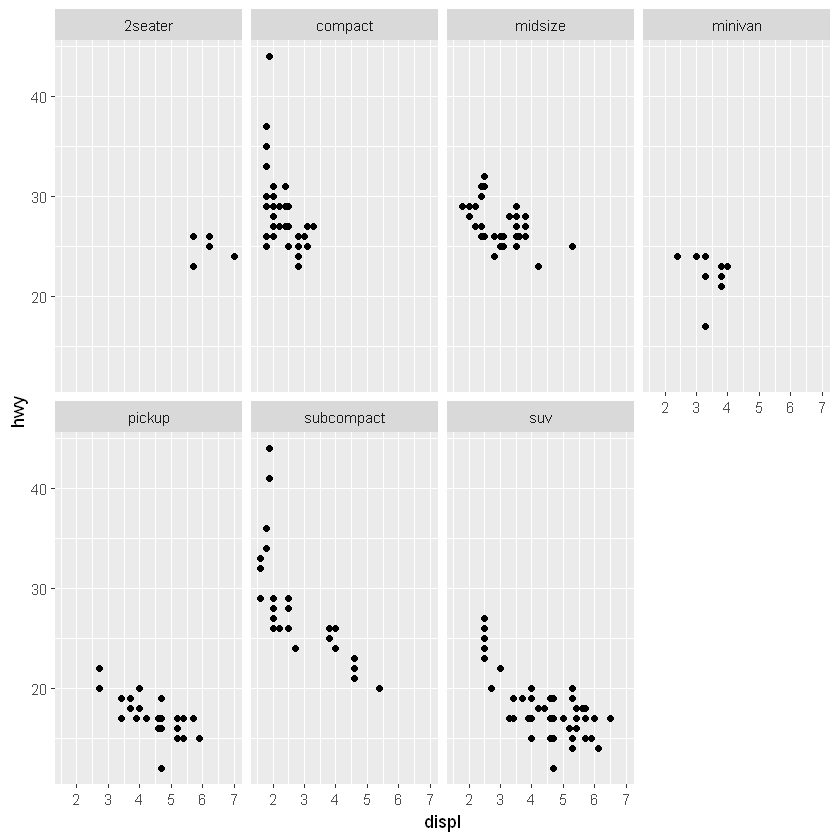

In [5]:
ggplot(data = mpg)+
    geom_point(mapping = aes(x = displ, y = hwy))+
    facet_wrap(~ class, nrow = 2)

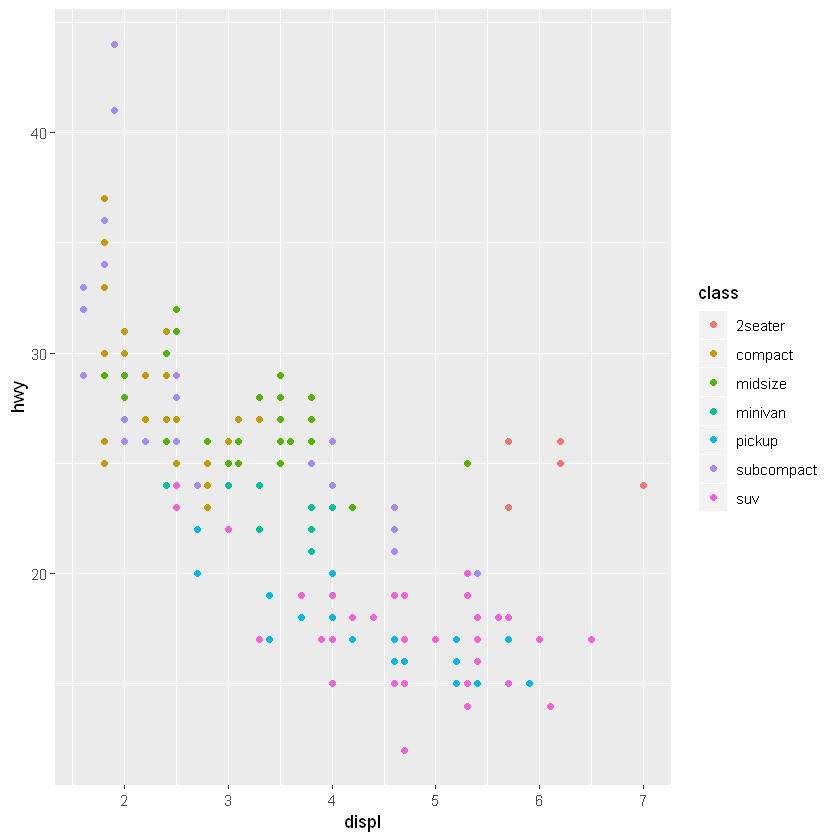

In [6]:
ggplot(data = mpg)+
    geom_point(mapping = aes(x = displ, y = hwy, color = class))

_An advantage of using facets over color is to avoid not being able to tell variance in color distinction(Case in point here I can't seem to  notice any difference in the color aesthetics between minivan and pickup classes)_

_The disadvantage of using facets over color is that since the datapoints are in different plots comparing them might be a hustle_

_So as we get larger datasets distinction between colors become indistinguishable(if color used) and comparison becomes harder(if facets are used)_

**5. Read ?facet_wrap. What does nrow do? What does ncol do?
What other options control the layout of the individual panels?
Why doesn’t facet_grid() have nrow and ncol variables?**

In [7]:
?facet_wrap

facet_wrap {ggplot2},R Documentation
facets,"A set of variables or expressions quoted by vars() and defining faceting groups on the rows or columns dimension. The variables can be named (the names are passed to labeller). For compatibility with the classic interface, can also be a formula or character vector. Use either a one sided formula, ~a + b, or a character vector, c(""a"", ""b"")."
"nrow, ncol",Number of rows and columns.
scales,"Should scales be fixed (""fixed"", the default), free (""free""), or free in one dimension (""free_x"", ""free_y"")?"
shrink,"If TRUE, will shrink scales to fit output of statistics, not raw data. If FALSE, will be range of raw data before statistical summary."
labeller,"A function that takes one data frame of labels and returns a list or data frame of character vectors. Each input column corresponds to one factor. Thus there will be more than one with formulae of the type ~cyl + am. Each output column gets displayed as one separate line in the strip label. This function should inherit from the ""labeller"" S3 class for compatibility with labeller(). See label_value() for more details and pointers to other options."
as.table,"If TRUE, the default, the facets are laid out like a table with highest values at the bottom-right. If FALSE, the facets are laid out like a plot with the highest value at the top-right."
switch,"By default, the labels are displayed on the top and right of the plot. If ""x"", the top labels will be displayed to the bottom. If ""y"", the right-hand side labels will be displayed to the left. Can also be set to ""both""."
drop,"If TRUE, the default, all factor levels not used in the data will automatically be dropped. If FALSE, all factor levels will be shown, regardless of whether or not they appear in the data."
dir,"Direction: either ""h"" for horizontal, the default, or ""v"", for vertical."
strip.position,"By default, the labels are displayed on the top of the plot. Using strip.position it is possible to place the labels on either of the four sides by setting strip.position = c(""top"", ""bottom"", ""left"", ""right"")"


_nrow specifies the number of row(s) in the facetted plot, ncol specifies the number of column(s) in the facetted plot._

_face_grid() doesn't have nrow and ncol variables because the number of rows and columns are specified with the values within it_

**6. When using facet_grid() you should usually put the variable with more unique levels in the columns. Why?**

_This is because the y-axis will be long and the grading on the y-axis will constrict further if a variable with more unique levels arecplaced in a row making reading values for data points harder_